In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import distances
import flag_mean

In [2]:
def generate_gr_lattice(m,n, eps=.1, num=4, distance='chordal'):
    sub1 = np.random.random((m,n))
    subspaces=[]
    subspaces.append(np.linalg.qr(sub1)[0])
    for i in range(num-1):
        sub = subspaces[0] +0
        subspaces.append(np.linalg.qr(sub)[0])
    for i in range(num):
        for j in range(num):
            sub = distances.geodesic(subspaces[i], subspaces[j], .25)
            subspaces.append(np.linalg.qr(sub)[0])
            sub = distances.geodesic(subspaces[i], subspaces[j], .5)
            subspaces.append(np.linalg.qr(sub)[0])
            sub = distances.geodesic(subspaces[i], subspaces[j], .75)
            subspaces.append(np.linalg.qr(sub)[0])
    mean = flag_mean.flag_mean(subspaces)
    subspaces.append(mean)
    if distance == 'chordal':
        D = distances.chordal_distance(subspaces,subspaces)
    elif distance == 'geodesic':
        D = distances.geodesic_distance(subspaces,subspaces)
    elif distance == 'angle':
        D = distances.prin_angle_distance(subspaces,subspaces)
    else:
        print('Invalid distance metric selected')
        return
    embed = distances.mds(D, eigplot=True)
    count = 0
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
    fig.suptitle('MDS embedding, eps = %.2f' % eps)
    for i in range(num):
        for j in range(num):
            idx = [i, 3*count+num, 3*count+num+1, 3*count+num+2, j]
            ax[0].plot(embed[idx,0], embed[idx,1],'bo-')
            ax[1].plot(embed[idx,1], embed[idx,2],'bo-')
            ax[2].plot(embed[idx,2], embed[idx,3],'bo-')
            count += 1
    ax[0].plot(embed[0:num+1,0], embed[0:num+1,1],'ko')
    ax[1].plot(embed[0:num+1,1], embed[0:num+1,2],'ko')
    ax[2].plot(embed[0:num+1,2], embed[0:num+1,3],'ko')
    ax[0].plot(embed[-1,0], embed[-1,1], 'ro')
    ax[1].plot(embed[-1,0], embed[-1,1], 'ro')
    ax[2].plot(embed[-1,0], embed[-1,1], 'ro')
    ax[0].set_xlabel('Embed Dim 1')
    ax[0].set_ylabel('Embed Dim 2')
    ax[1].set_xlabel('Embed Dim 2')
    ax[1].set_ylabel('Embed Dim 3')
    ax[2].set_xlabel('Embed Dim 3')
    ax[2].set_ylabel('Embed Dim 4')
    plt.show()
    return subspaces

Starting with MDS embeddings of 4 randomly generated points using varying epsilon values in Gr(2,10) and points on geodesics between each. Black dots are the generated points, red dots are the flag mean of all points (including the three on each geodesic). 

Default uses chordal metric for pairwise distances.

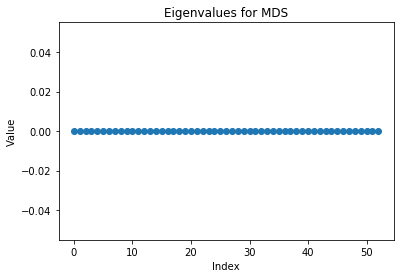

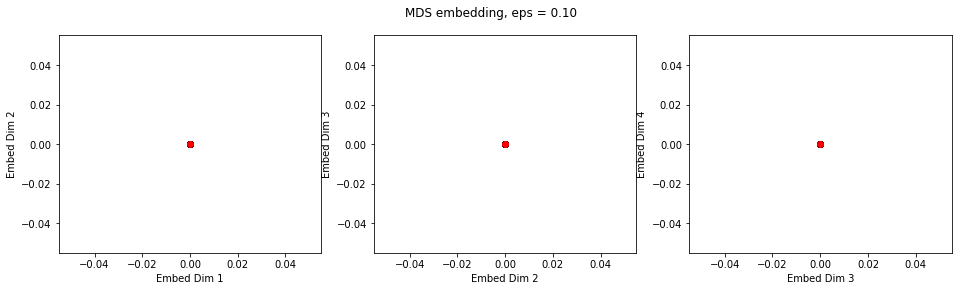

In [3]:
x = generate_gr_lattice(10,2)

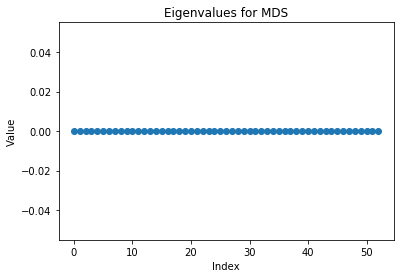

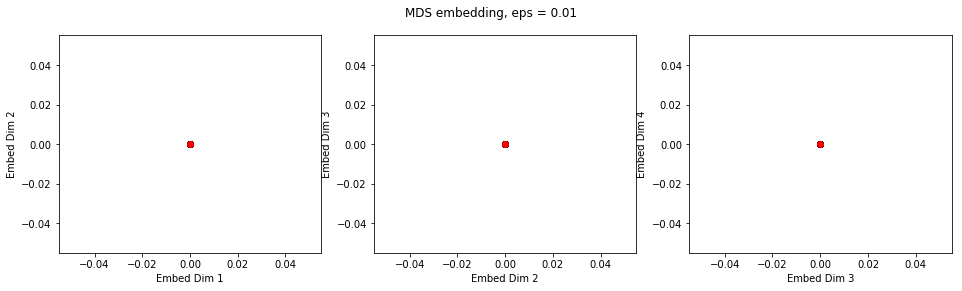

In [4]:
x = generate_gr_lattice(10,2, eps=.01)

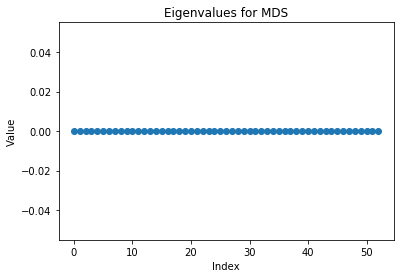

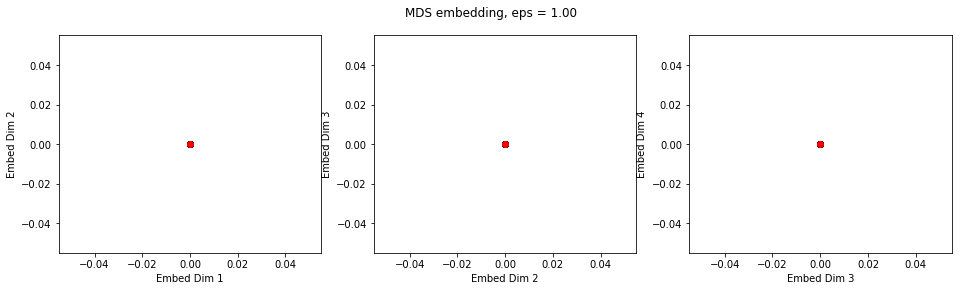

In [ ]:
x = generate_gr_lattice(10,2, eps=1)

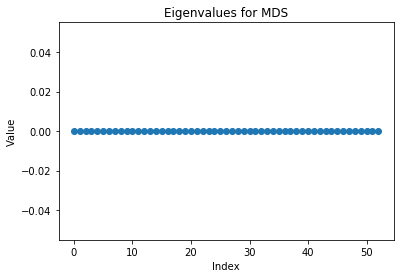

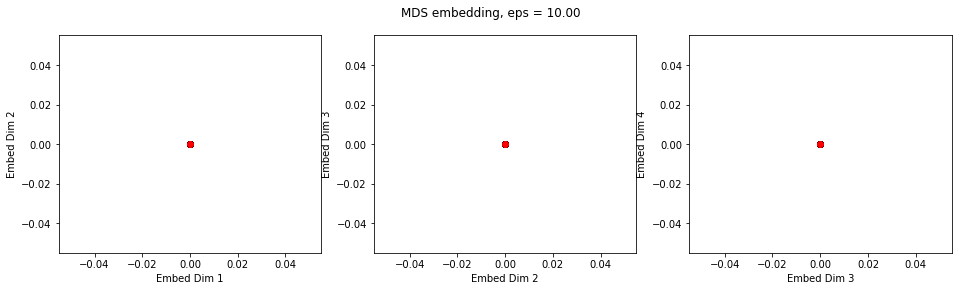

In [ ]:
x = generate_gr_lattice(10,2, eps=10)

Geodesic embeddings start here:

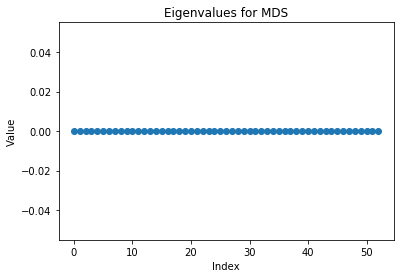

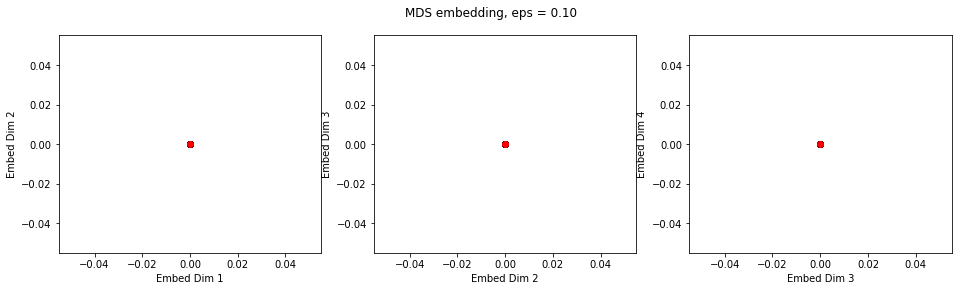

In [ ]:
x = generate_gr_lattice(10,2, eps=.1, distance='geodesic')

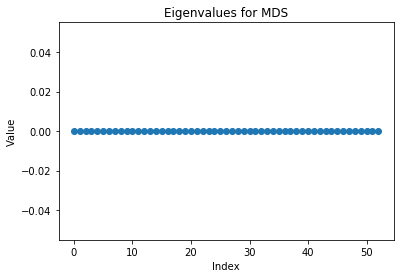

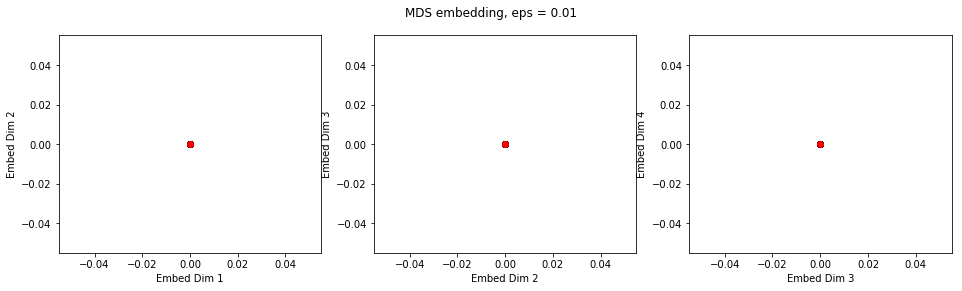

In [ ]:
x = generate_gr_lattice(10,2, eps=.01, distance='geodesic')

In [ ]:
x = generate_gr_lattice(10,2, eps=1, distance='geodesic')

In [ ]:
x = generate_gr_lattice(10,2, eps=10, distance='geodesic')

Back to chordal embeddings, trying a higher number of points:

In [ ]:
x = generate_gr_lattice(10,2, num=6, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=.1, distance='chordal')

10 random points and associated geodesics seems to be a good balance between total number of points and readability of figures.

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=1, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

Here it isn't centered for large epsilon. Doesn't happen in the 
Gr(20,200) case further down.

Switching to Gr(20,200):

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=1000, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=10, eps=10000, distance='chordal')

Tried using fewer points here, still doesn't have that problem

In [ ]:
x = generate_gr_lattice(200,20, num=4, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=4, eps=1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=4, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,20, num=4, eps=100, distance='chordal')

Maybe its something with the ratio of the subspace and ambient dimensions? Trying Gr(200,40)

In [ ]:
x = generate_gr_lattice(200,40, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,40, num=10, eps=1, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,40, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(200,40, num=10, eps=100, distance='chordal')

Or maybe other lower dimensional grassmannians

In [ ]:
x = generate_gr_lattice(20,10, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(20,10, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(20,10, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,5, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,5, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(15,2, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(15,2, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(15,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,3, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,3, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(8,2, num=10, eps=.1, distance='chordal')

In [ ]:
x = generate_gr_lattice(8,2, num=10, eps=10, distance='chordal')

In [ ]:
x = generate_gr_lattice(8,2, num=10, eps=100, distance='chordal')

Repeating tests of the one that had the center near the side

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

The second one with odd center placement in dimensions 3 and 4. This and the first one also seem to have one "outlier" in the originally generated points.

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

In [ ]:
x = generate_gr_lattice(10,2, num=10, eps=100, distance='chordal')

Maybe an issue with individual points that are far away from the rest? Also none of these have issues in the first two dimensions, which is not what was happening before.